# Phase 2 - Feature Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
proc_data=pd.read_csv('/Users/kshitijmittal/Desktop/automatic-essay-grading/data/processed_essays.csv')
proc_data

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text,sent_count,sent_len,word_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"['think', 'students', 'would', 'benefit', 'lea...","['think', 'student', 'would', 'benefit', 'lear...",18,14.500000,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"['problem', 'change', 'let', 'best', 'matter',...","['problem', 'change', 'let', 'best', 'matter',...",14,38.071429,533
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"['dear', 'principal', 'change', 'school', 'pol...","['dear', 'principal', 'change', 'school', 'pol...",19,16.842105,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"['best', 'time', 'life', 'become', 'agree', 'g...","['best', 'time', 'life', 'become', 'agree', 'g...",36,20.222222,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"['small', 'act', 'kindness', 'impact', 'people...","['small', 'act', 'kindness', 'impact', 'people...",3,78.000000,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,"['believe', 'using', 'cellphones', 'class', 'e...","['believe', 'use', 'cellphone', 'class', 'educ...",6,29.833333,179
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,"['working', 'alone', 'students', 'argue', 'dec...","['work', 'alone', 'student', 'argue', 'decissi...",16,29.062500,465
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,"['problem', 'chance', 'best', 'think', 'quote'...","['problem', 'chance', 'best', 'think', 'quote'...",8,32.125000,257
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,"['many', 'people', 'disagree', 'albert', 'schw...","['many', 'people', 'disagree', 'albert', 'schw...",21,24.285714,510


In [3]:
proc_data['lemmatized_text'].isna().sum()

0

### CountVectorizer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer.fit(proc_data['lemmatized_text'])

In [5]:
vectorized_text=vectorizer.fit_transform(proc_data['lemmatized_text'].apply(lambda x: ''.join(x)))

In [6]:
df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names())

In [7]:
df_vectorized

,021419,03102020,031219,031519,03192019,032019,03202019,0492019,050,0school,...,zere,zero,zip,zombie,zone,zonned,zoo,zoology,zore,zurkrbuirg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_vectorized.isna().sum().sum()

0

In [9]:
df_vectorized_array = df_vectorized.apply(lambda x: x.values if len(x.values.shape) == 1 else np.concatenate([x.values]), axis=1)


In [10]:
df_vectorized_array

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
3906    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3907    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3908    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3909    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3910    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Length: 3911, dtype: object

In [11]:
proc_data_2=proc_data.copy()
proc_data_2['count_vector']=df_vectorized_array

In [12]:
#df_vectorized_array = df_vectorized.apply(lambda x: np.hstack(x.values), axis=1)

In [13]:
proc_data_2

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text,sent_count,sent_len,word_count,count_vector
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"['think', 'students', 'would', 'benefit', 'lea...","['think', 'student', 'would', 'benefit', 'lear...",18,14.500000,261,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"['problem', 'change', 'let', 'best', 'matter',...","['problem', 'change', 'let', 'best', 'matter',...",14,38.071429,533,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"['dear', 'principal', 'change', 'school', 'pol...","['dear', 'principal', 'change', 'school', 'pol...",19,16.842105,320,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"['best', 'time', 'life', 'become', 'agree', 'g...","['best', 'time', 'life', 'become', 'agree', 'g...",36,20.222222,728,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"['small', 'act', 'kindness', 'impact', 'people...","['small', 'act', 'kindness', 'impact', 'people...",3,78.000000,234,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,"['believe', 'using', 'cellphones', 'class', 'e...","['believe', 'use', 'cellphone', 'class', 'educ...",6,29.833333,179,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,"['working', 'alone', 'students', 'argue', 'dec...","['work', 'alone', 'student', 'argue', 'decissi...",16,29.062500,465,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,"['problem', 'chance', 'best', 'think', 'quote'...","['problem', 'chance', 'best', 'think', 'quote'...",8,32.125000,257,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,"['many', 'people', 'disagree', 'albert', 'schw...","['many', 'people', 'disagree', 'albert', 'schw...",21,24.285714,510,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### TF-IDF

In [14]:
def tf_idf(data):
    vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=100)
    vec_text = vectorizer.fit_transform(data)
    X = pd.DataFrame.sparse.from_spmatrix(vec_text)
    X.columns = vectorizer.get_feature_names_out().tolist()
    X=X.reset_index(drop=True)
    data=data.reset_index(drop=True)
    newdata = pd.concat([data, X],axis=1)
    del X
    gc.collect()
    return newdata


In [15]:
proc_data_2.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text,sent_count,sent_len,word_count,count_vector
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"['think', 'students', 'would', 'benefit', 'lea...","['think', 'student', 'would', 'benefit', 'lear...",18,14.500000,261,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"['problem', 'change', 'let', 'best', 'matter',...","['problem', 'change', 'let', 'best', 'matter',...",14,38.071429,533,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"['dear', 'principal', 'change', 'school', 'pol...","['dear', 'principal', 'change', 'school', 'pol...",19,16.842105,320,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"['best', 'time', 'life', 'become', 'agree', 'g...","['best', 'time', 'life', 'become', 'agree', 'g...",36,20.222222,728,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"['small', 'act', 'kindness', 'impact', 'people...","['small', 'act', 'kindness', 'impact', 'people...",3,78.000000,234,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=10)

In [17]:
vec_text_tfidf=TFIDF_vectorizer.fit_transform(proc_data_2['lemmatized_text'])

In [18]:
df_vectorized_tfid = pd.DataFrame(vec_text_tfidf.toarray())
#df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names())

In [19]:
df_vectorized_tfidf = pd.DataFrame(vec_text_tfidf.toarray())
df_vectorized_tfidf.columns = TFIDF_vectorizer.get_feature_names()

In [20]:
df_vectorized_tfidf.head()

,100,1000,11th,2015,2019,4th,5th,6th,7th,7th grade,...,young person,young sibling,young student,youre,youself,youth,youtube,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_vectorized_tfidf_array = df_vectorized_tfidf.apply(lambda x: x.values if len(x.values.shape) == 1 else np.concatenate([x.values]), axis=1)

In [22]:
proc_data_3=proc_data_2.copy()
proc_data_3['tfidf_vector']=df_vectorized_tfidf_array

In [23]:
proc_data_3.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text,sent_count,sent_len,word_count,count_vector,tfidf_vector
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"['think', 'students', 'would', 'benefit', 'lea...","['think', 'student', 'would', 'benefit', 'lear...",18,14.500000,261,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"['problem', 'change', 'let', 'best', 'matter',...","['problem', 'change', 'let', 'best', 'matter',...",14,38.071429,533,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"['dear', 'principal', 'change', 'school', 'pol...","['dear', 'principal', 'change', 'school', 'pol...",19,16.842105,320,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"['best', 'time', 'life', 'become', 'agree', 'g...","['best', 'time', 'life', 'become', 'agree', 'g...",36,20.222222,728,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"['small', 'act', 'kindness', 'impact', 'people...","['small', 'act', 'kindness', 'impact', 'people...",3,78.000000,234,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
proc_data_3['tfidf_vector']

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
3906    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3907    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3908    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3909    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3910    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf_vector, Length: 3911, dtype: object

## Initial Modeling - With CV and TF-IDF

#### Word2Vec

In [25]:
#%pip install gensim
import gensim
from gensim.models import Word2Vec

In [26]:
W2V_model = gensim.models.Word2Vec(proc_data_3['lemmatized_text'], min_count = 1,
                              vector_size = 100, window = 5)

# Phase 3 - Modeling

In [84]:
proc_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text_id                3911 non-null   object 
 1   full_text              3911 non-null   object 
 2   cohesion               3911 non-null   float64
 3   syntax                 3911 non-null   float64
 4   vocabulary             3911 non-null   float64
 5   phraseology            3911 non-null   float64
 6   grammar                3911 non-null   float64
 7   conventions            3911 non-null   float64
 8   cleaned_tokenize_text  3911 non-null   object 
 9   lemmatized_text        3911 non-null   object 
 10  sent_count             3911 non-null   int64  
 11  sent_len               3911 non-null   float64
 12  word_count             3911 non-null   int64  
 13  count_vector           3911 non-null   object 
 14  tfidf_vector           3911 non-null   object 
 15  lemm

In [ ]:
proc_data_3.lemmatized_text

In [85]:
proc_data_3.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,cleaned_tokenize_text,lemmatized_text,sent_count,sent_len,word_count,count_vector,tfidf_vector,lemm_text_str
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"['think', 'students', 'would', 'benefit', 'lea...","['think', 'student', 'would', 'benefit', 'lear...",18,14.500000,261,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","['think', 'student', 'would', 'benefit', 'lear..."
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"['problem', 'change', 'let', 'best', 'matter',...","['problem', 'change', 'let', 'best', 'matter',...",14,38.071429,533,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","['problem', 'change', 'let', 'best', 'matter',..."
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"['dear', 'principal', 'change', 'school', 'pol...","['dear', 'principal', 'change', 'school', 'pol...",19,16.842105,320,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","['dear', 'principal', 'change', 'school', 'pol..."
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"['best', 'time', 'life', 'become', 'agree', 'g...","['best', 'time', 'life', 'become', 'agree', 'g...",36,20.222222,728,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","['best', 'time', 'life', 'become', 'agree', 'g..."
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"['small', 'act', 'kindness', 'impact', 'people...","['small', 'act', 'kindness', 'impact', 'people...",3,78.000000,234,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","['small', 'act', 'kindness', 'impact', 'people..."


# Word2Vec

In [161]:
from tqdm import tqdm
from sklearn import mixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV


In [165]:
story=[]
for x in proc_data_3['lemmatized_text']:
    story.append(eval(x))

In [ ]:
proc_data_3

In [166]:
model_W2V = gensim.models.Word2Vec(
    vector_size=200,
    window=5,
    min_count=2
)
model_W2V.build_vocab(story)
model_W2V.train(story, total_examples=model_W2V.corpus_count, epochs=5)

(2939213, 3795125)

In [168]:
len(model_W2V.wv.index_to_key)

8415

In [169]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model_W2V.wv.index_to_key]
    return np.mean(model_W2V.wv[doc], axis=0)

In [170]:
from tqdm import tqdm
X = []
for doc in tqdm(story):
    X.append(document_vector(doc))

  0%|          | 0/3911 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'split'

# Phase 3 - Doc2Vec

In [25]:
processed_essays_train=[]
for x in proc_data_3['lemmatized_text']:
    processed_essays_train.append(eval(x))

In [28]:
processed_essays_train[0]

['think',
 'student',
 'would',
 'benefit',
 'learn',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'take',
 'class',
 'help',
 'house',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'get',
 'ready',
 'wake',
 'brush',
 'teeth',
 'closet',
 'look',
 'cloth',
 'think',
 'picked',
 'outfit',
 'look',
 'mirror',
 'youll',
 'either',
 'like',
 'look',
 'see',
 'stain',
 'change',
 'online',
 'class',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'student',
 'usually',
 'take',
 'shower',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'student',
 'smell',
 'good',
 'cause',
 'miss',
 'bus',
 'effect',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'online',
 'class',
 'wont',
 'need',
 'miss',
 'lesson',
 'cause',
 'get',
 'everything',
 'set',
 'take',
 'shower',
 'get',
 'ready',
 'home',
 'comfortable',
 'pay',
 'attention',
 'give',
 'advantage',
 'smarter',
 'even',
 'p

In [29]:
# d2v import
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [30]:
processed_essays_train_tagged = [TaggedDocument(processed_essays_train[i], list(proc_data_3.iloc[i,2:8])) for i in range(0,len(processed_essays_train))]

In [31]:
processed_essays_train_tagged[-1]

TaggedDocument(words=['think', 'failure', 'main', 'thing', 'people', 'consist', 'goal', 'success', 'without', 'lose', 'enthusiasm', 'agree', 'important', 'role', 'failure', 'play', 'pursuit', 'success', 'life', 'think', 'failure', 'main', 'key', 'people', 'reach', 'goal', 'need', 'idea', 'failure', 'come', 'success', 'secondly', 'need', 'positive', 'mind', 'want', 'want', 'reach', 'success', 'life', 'last', 'prepared', 'failure', 'prepared', 'confront', 'failure', 'need', 'keep', 'mind', 'everything', 'go', 'way', 'want', 'time', 'always', 'need', 'mind', 'everything', 'possible', 'effort', 'first', 'people', 'need', 'idea', 'failure', 'come', 'success', 'everything', 'happens', 'reason', 'something', 'go', 'wrong', 'certain', 'reason', 'moment', 'try', 'success', 'need', 'accept', 'thing', 'keep', 'try', 'need', 'really', 'patience', 'example', 'baby', 'try', 'walk', 'fall', 'many', 'time', 'get', 'keep', 'try', 'reach', 'goal', 'case', 'walk', 'many', 'case', 'people', 'car', 'accide

In [32]:
doc2vecModel = Doc2Vec(vector_size=200, window=2, dm=0,min_count=20, workers=8, epochs = 60)
#build vocab
doc2vecModel.build_vocab(processed_essays_train_tagged)
#train model
doc2vecModel.train(processed_essays_train_tagged, total_examples=doc2vecModel.corpus_count, epochs=doc2vecModel.epochs)


In [33]:
# Discuss with Manish
print(len(processed_essays_train_tagged))
print(len(doc2vecModel.docvecs))


3911
9


In [34]:
doc_vector=[doc2vecModel.infer_vector(processed_essays_train[i]) for i in range(0,len(processed_essays_train))]

In [35]:
len(doc_vector)

3911

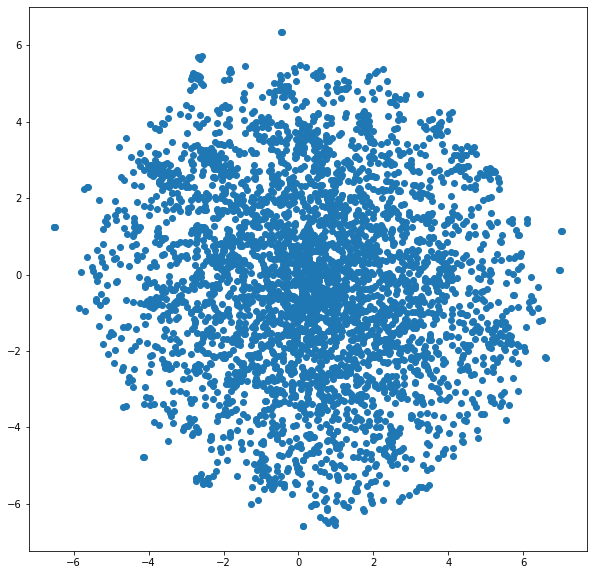

In [36]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(doc_vector)

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [39]:
len(doc_vector[0])

200

## Baseline Modeling

In [58]:
# Separating Target Variables
cohesion = proc_data_3.cohesion.values
syntax = proc_data_3.syntax.values
vocabulary = proc_data_3.vocabulary.values
phraseology = proc_data_3.phraseology.values
grammar = proc_data_3.grammar.values
conventions = proc_data_3.conventions.values

Y = proc_data_3[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]
print(Y)

      cohesion  syntax  vocabulary  phraseology  grammar  conventions
0          3.5     3.5         3.0          3.0      4.0          3.0
1          2.5     2.5         3.0          2.0      2.0          2.5
2          3.0     3.5         3.0          3.0      3.0          2.5
3          4.5     4.5         4.5          4.5      4.0          5.0
4          2.5     3.0         3.0          3.0      2.5          2.5
...        ...     ...         ...          ...      ...          ...
3906       2.5     3.0         3.0          3.5      2.5          2.5
3907       4.0     4.0         4.0          4.0      3.5          3.0
3908       2.5     3.0         3.0          3.0      3.5          3.0
3909       4.0     4.5         4.5          4.0      4.5          4.5
3910       3.5     2.5         3.5          3.0      3.0          3.5

[3911 rows x 6 columns]


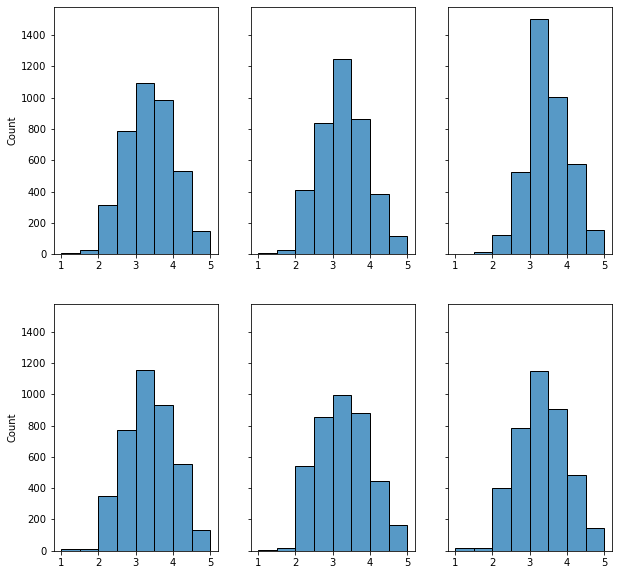

In [52]:
_, axes = plt.subplots(2, 3, sharey=True, figsize=(10, 10))
sns.histplot(cohesion, ax=axes[0,0], bins=8)
sns.histplot(syntax, ax=axes[0,1], bins=8)
sns.histplot(vocabulary, ax=axes[0,2], bins=8)
sns.histplot(phraseology, ax=axes[1,0], bins=8)
sns.histplot(grammar, ax=axes[1,1], bins=8)
sns.histplot(conventions, ax=axes[1,2], bins=8)


In [64]:
X = pd.DataFrame(doc_vector)
X['sent_count']=proc_data_3['sent_count']
X['sent_len']=proc_data_3['sent_len']
X['word_count']=proc_data_3['word_count']
X

# Tabular representation of our data

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,sent_count,sent_len,word_count
0,-0.179214,0.356290,-0.114753,0.521641,-0.211414,-0.112839,-0.528706,0.656564,-0.300483,1.151588,...,0.606738,0.496825,-0.799055,0.174988,-0.673146,0.464546,1.005852,18,14.500000,261
1,-0.170914,-0.171819,0.333515,-0.271629,0.145531,-0.223681,0.402173,0.894281,0.608721,0.173030,...,0.132468,0.070377,0.473242,0.039449,-0.244706,-0.526570,0.339428,14,38.071429,533
2,0.446901,0.593635,-0.556510,0.734098,-0.358913,-0.086004,-0.275171,0.026408,0.389987,1.324631,...,0.148761,0.885454,-0.762823,0.294997,0.391588,0.430580,0.473169,19,16.842105,320
3,-0.126590,-0.672814,-0.228914,-0.837389,0.240610,-1.427670,0.839180,0.186094,-0.104259,0.416369,...,0.318731,1.204564,0.661944,-0.624463,-0.443464,1.320315,-0.359129,36,20.222222,728
4,-0.220878,-0.465762,-0.038425,0.693283,-0.590883,-0.061557,-0.418841,0.363514,-0.961032,-0.251499,...,0.237479,-0.419751,-0.256970,-0.234229,-0.562201,-0.006396,0.488925,3,78.000000,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0.090277,-0.218029,-1.125503,0.312250,0.535365,0.559597,-0.514516,0.371922,0.392657,-0.260121,...,0.547094,0.582711,0.171655,-0.175508,-0.215227,-0.008022,0.694553,6,29.833333,179
3907,-0.483668,-0.685489,0.172665,-0.116938,0.502064,-0.441247,0.571535,0.506323,-0.116704,0.561754,...,-0.618443,0.290135,-0.170314,-0.457711,-0.345367,0.110845,0.268452,16,29.062500,465
3908,-0.501839,-0.204954,0.163235,-0.284400,-0.428505,-0.024219,0.156125,-0.011682,0.314756,0.307994,...,0.508485,0.066110,0.076742,0.502115,-0.582722,0.295118,-0.172138,8,32.125000,257
3909,-0.762649,-1.732807,-0.578913,1.193956,0.380346,-0.595412,0.129188,0.370553,0.163133,-0.076796,...,-0.414380,-0.445006,-0.479151,-0.043695,-0.636893,0.672943,-0.401789,21,24.285714,510


In [67]:
# Inspecting Cohesion
X = X
y = Y['cohesion']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (3128, 203)
X_test:  (783, 203)
y_train:  (3128,)
y_test:  (783,)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb
import catboost as cb

from sklearn.metrics import mean_squared_error

# SVR
# XGBRegressor
# RFRegressor
# AdaboostRegressor
# Catboost

mods = [LinearRegression, RandomForestRegressor, SVR, xgb.XGBRegressor, cb.CatBoostRegressor]
mods

[sklearn.linear_model._base.LinearRegression,
 sklearn.ensemble._forest.RandomForestRegressor,
 sklearn.svm._classes.SVR,
 xgboost.sklearn.XGBRegressor,
 catboost.core.CatBoostRegressor]

In [83]:
def dmp_first_regressor(model):
    regressor = model()
    regressor.fit(X_train, y_train)
    y_preds=regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    #print('RMSE with ',model,' is ',rmse)
    return rmse


In [ ]:
for i in mods:
    print(i)
    mod_run=dmp_first_regressor(i)
    print('\n')

In [85]:
output=[]
for i in (Y.columns):
    #print("Currently investigating ",i)
    X = X
    y = Y[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for j in mods:
        #print ('Current Model is ',j)
        nested_output=[i,j,dmp_first_regressor(j)]
        print(nested_output)
        output.append(nested_output)
    print(output)


['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5370925359606139]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5671122881598182]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5977252549796671]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6011611357395854]
Learning rate set to 0.049027
0:	learn: 0.6602864	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6559014	total: 28.7ms	remaining: 14.3s
2:	learn: 0.6515702	total: 37.6ms	remaining: 12.5s
3:	learn: 0.6466457	total: 45.2ms	remaining: 11.3s
4:	learn: 0.6420504	total: 54.5ms	remaining: 10.8s
5:	learn: 0.6376074	total: 62.3ms	remaining: 10.3s
6:	learn: 0.6339812	total: 70.4ms	remaining: 9.99s
7:	learn: 0.6302685	total: 79.1ms	remaining: 9.81s
8:	learn: 0.6265967	total: 86.5ms	remaining: 9.52s
9:	learn: 0.6236586	total: 94.3ms	remaining: 9.34s
10:	learn: 0.6207650	total: 102ms	remaining: 9.19s
11:	learn: 0.6178802	total: 111ms	remaining: 9.13s
12:	learn: 0.6151973	total: 119ms	rem

In [86]:
for x in output:
    print(x)

['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5370925359606139]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5671122881598182]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5977252549796671]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6011611357395854]
['cohesion', <class 'catboost.core.CatBoostRegressor'>, 0.5362381544436924]
['syntax', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5117894892031317]
['syntax', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5553427945085053]
['syntax', <class 'sklearn.svm._classes.SVR'>, 0.5897682085295065]
['syntax', <class 'xgboost.sklearn.XGBRegressor'>, 0.5660656767036184]
['syntax', <class 'catboost.core.CatBoostRegressor'>, 0.514866391120363]
['vocabulary', <class 'sklearn.linear_model._base.LinearRegression'>, 0.46696122465330553]
['vocabulary', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.49859070225790736]
['vocabulary', <class 'sklearn.s

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print(rmse)


------------

In [193]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(train_x,train_y)
y_preds=model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, y_preds))
print(rmse)

0.5261617020022412


In [ ]:
### Trying another Doc2Vec

In [200]:
doc2vecModel2 = Doc2Vec(vector_size=200, window=2, dm=0,min_count=50, workers=2, epochs = 60)
#build vocab
doc2vecModel2.build_vocab(processed_essays_train_tagged)
#train model
doc2vecModel2.train(processed_essays_train_tagged, total_examples=doc2vecModel2.corpus_count, epochs=doc2vecModel2.epochs)

In [203]:
print(doc2vecModel2.docvecs)


In [204]:
xx2=[doc2vecModel2.infer_vector(processed_essays_train[i]) for i in range(0,len(processed_essays_train))]

In [206]:
X2 = np.array(xx2)

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X2, y, test_size=0.2, random_state=42)
model.fit(train_x,train_y)
y_preds=model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, y_preds))
print(rmse)


0.5798814671674204


--------
### Optuna

In [147]:
optuna_train_values=np.zeros(len(cohesion_train))

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [180]:
X=X
y=cohesion_train.reshape(-1,1)
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',10,1000)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )

    model.fit(X,y)
    y_pred=model.predict(X)
    mse=mean_squared_error(y, y_pred)

In [181]:
# Create a study and run the optimization process

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-02-25 17:49:14,100] A new study created in memory with name: no-name-a647ea25-643c-47f9-ac71-9077e3c6bb94
[W 2023-02-25 17:49:14,103] Trial 0 failed with parameters: {'n_estimators': 307, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 1} because of the following error: ValueError('Expected 2D array, got 1D array instead:\narray=[].\nReshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.').
Traceback (most recent call last):
  File "/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/bc/l3jxf3wn11n_gkl2jz5m2vph0000gn/T/ipykernel_67813/1520720146.py", line 17, in objective
    model.fit(X,y)
  File "/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "/Users/kshitijmitta

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
best_params = study.best_params
print(best_params)

In [ ]:
pip install lightgbm

In [158]:
def objective(trial, data=X, target=optuna_train_values):
    print(optuna_train_values)
    train_x, test_x, train_y, test_y = model_selection.train_test_split(data, target, test_size=0.2, random_state=42)
    param = {
        'metric': 'rmse', 
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.001, 0.01, 0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.2, 0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.004, 0.008, 0.01, 0.02, 0.05, .1, 0.2, 0.5]),
        'max_depth': trial.suggest_categorical('max_depth', [10, 20,100, 150]),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
    }
    model = LGBMRegressor(**param)  
    model.fit(train_x, train_y, eval_set=[(test_x, test_y)], callbacks=[log_evaluation(period=0)])
    preds = model.predict(test_x)
    rmse = np.sqrt(metrics.mean_squared_error(test_y, preds))
    return rmse


SVR
XGBRegressor
RFRegressor
AdaboostRegressor
Catboost

